<a href="https://colab.research.google.com/github/JuanCervigon/Master/blob/main/091_PCA_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de componentes principales


# Introducción


El Análisis de Componentes Principales (PCA) es una herramienta para reducir la dimensión de un conjunto de datos tabular, es decir, consiste en transformar el el conjunto de datos inicial en un nuevo conjunto de datos con menos columnas minimizando la pérdida de información.

Reducir la dimensionalidad de los datos significa reducir el número de columnas. Lógicamente, prescindiremos de las columnas que aportan menor información al conjunto de datos. Por ejemplo, supongamos que tenemos conjunto de datos de jugadores de fútbol de la FIFA con el peso, la altura y la edad de cada jugador. Es decir tenemos tres dimensiones y queremos reducir el conjunto de datos a dos dimensiones. ¿Qué columna quitaríamos?. Evidentemente quitariamos la altura o el peso, ya que si quitamos la edad perdemos mucha información sobre el conjunto de los jugadores pero si quitamos el peso o la altura, perdemos menos información.

El proceso de reducir la dimensión es eliminando columnas, pero antes de eliminarlas se transforman los datos para crear unas nuevas dimensiones con la misma información que el conjunto de datos original pero tratando de que las sucesivas nuevas dimansiones tengan una variabilidad decreciente. Es decir, la primera columna contiene la mayor variabilidad posible, la segunda columna mayor variabilidad posible después restante una vez extraida la primera columna... etc.

Una vez se ha transformado el conjunto de datos inicial en un nuevo conjunto de datos, pero con la variabilidad de las columnas en orden descendente, podemos eliminar las columnas con menor variabilidad para reducir la dimensión pero manteniendo la mayor información posible.

En efecto, si quitamos una dimensión, es decir, si quitamos una columna, quitaremos la columna que tiene menor variabilidad (menor cantidad de información), si quitamos dos columnas, quitaremos las dos con menor variabilidad... etc. La decisión de cúantas columnas se pueden quitar depende de cada caso concreto. Es una decisión que debe tomar el analista equilibrando la ganancia por reducir la dimensión frente a la pérdida de información.

Por lo tanto el PCA consiste en transformar los datos originales en unos nuevos datos y después el analista decide las columnas que quiere descartar del nuevo conjunto de datos.

La transformación se lleva a cabo mediante una matriz cuadrada $v$ de $dxd$ dimensiones que hay que calcular. Si llamamos $x$ al conjunto inicial de datos tenemos

$xv=y$


En el ejemplo anterior, $x$ sería una matriz de dimensión $nx3$, siendo $n$ el número de jugadores y 3 el número de dimensiones (peso, altura y edad). En este caso la matriz $v$ a calcular tendría dimensión $3x3$ y el nuevo conjunto de datos $y$ se calcularía $y=xv$. Evidentemente el nuevo conjunto de datos tiene dimensión $nx3$. Finalmente, para reducir la dimensión, se eliminaría la tercera columna de la matriz $y$

Este procedimiento tiene dos partes:
1.- Calcular la matriz $v$
2.- Decidir cuantas columnas eliminar de la matriz $y$


La primera parte es un problema puramente matemático que tiene solución única. La segunda parte es un problema de equilibrio, en el que tenemos que valorar si la ganancia por reducir la dimensión compensa la pérdida de información. Este equilibrio depende de cada caso concreto y es una decisión a tomar por el analista. El PCA nos ayuda a tomar esa decisión ya que se puede cuantificar la pérdida de información

Adicionalmente, el PCA nos permite visualizar los datos. Podemos tomar las dos primeras columnas de los datos transformados y hacer un gráfico tipo XY para visializar los individuos. Incluso podemos visualizarlos en un gráfico de 3 dimensiones si tomamos los tres primeras columnas. A partir de la inspección visual de los datos podemos sacar conclusiones sobre la estructura de los datos. Además en el gráfico anterior también podemos representar al mismo tiempo las variables originales en un gráfico denominado bi-plot



Los pasos para llevar a cabo un PCA son:

1. Estandarizar datos para centar los datos (media cero) y obtener una escala común (dividir por la desviación típica)
2. Calcular la matriz de covarianzas: muestra cómo se relacionan las variables entre sí
3. Calcular los vectores propios y valores propios de la matriz de covarianzas. Los vectores propios forman la matriz $v$. Los valores propios son la varianza de las nuevas columnas. Los valores prpios estan ordenados de mayor a menor.
4. Obtener os datos tansfoormados $y=xv$
5. Decidir el número de columnas a eliminar





# Datos

Utilizamos un conjunto de datos muy simple de 13 jugadores de futbol con las variables edad, altura y peso

Estandarizamos los datos  datos restando la media y dividiendo por la varianza de cada variable

In [ ]:
import numpy as np

# Conjunto de datos inicial
edad = np.array([ 25,  23,  25,  22,  30,  23,  27,  26,  26,  24,  28,  23,  25])
altura = np.array([184, 196, 184, 200, 200, 180, 176, 188, 192, 176, 180, 180, 192])
peso = np.array([ 80,  99,  86, 104,  98,  85,  72,  93,  94,  75,  83,  84,  96])

# Estandarización de los datos
edad_std = (edad - np.mean(edad)) / np.std(edad)
altura_std = (altura - np.mean(altura)) / np.std(altura)
peso_std = (peso - np.mean(peso)) / np.std(peso)

# Crear la matriz con los valores estandarizados
x = np.column_stack((edad_std, altura_std, peso_std))

In [ ]:
x

array([[-0.07062246, -0.33728926, -0.89416382],
       [-0.98871437,  1.12429753,  1.13206062],
       [-0.07062246, -0.33728926, -0.25430347],
       [-1.44776033,  1.61149313,  1.66527757],
       [ 2.22460734,  1.61149313,  1.02541722],
       [-0.98871437, -0.82448486, -0.36094686],
       [ 0.84746946, -1.31168046, -1.74731095],
       [ 0.3884235 ,  0.14990634,  0.49220027],
       [ 0.3884235 ,  0.63710194,  0.59884366],
       [-0.52966841, -1.31168046, -1.42738078],
       [ 1.30651542, -0.82448486, -0.57423365],
       [-0.98871437, -0.82448486, -0.46759025],
       [-0.07062246,  0.63710194,  0.81213044]])

# Analisis con Numpy

Primero calculamos la matriz de correlaciones y luego los valores y vectores propios de la matriz de correlaciones

Comprobamos que se cumplen determinadas igualdades

In [ ]:
# Calcular la matriz de correlaciones con numpy
S=np.corrcoef(x.T)
S

array([[ 1.        ,  0.0449937 , -0.11210226],
       [ 0.0449937 ,  1.        ,  0.94535673],
       [-0.11210226,  0.94535673,  1.        ]])

In [ ]:
# Calcular la matriz de correlaciones directamente
x.T@x/13

array([[ 1.        ,  0.0449937 , -0.11210226],
       [ 0.0449937 ,  1.        ,  0.94535673],
       [-0.11210226,  0.94535673,  1.        ]])

In [ ]:
# Calcular los valores y los vectores propios de la matriz S con numpy
eigenval, eigenvec = np.linalg.eig(S)

In [ ]:
# Imprimnir los autovalores
# Ojo! los autovalores no están ordenados de mayor a menor
eigenval

array([0.04175016, 1.01050073, 1.9477491 ])

In [ ]:
# Imprimir los autovectores
eigenvec

array([[-0.11529226,  0.99205464, -0.05035164],
       [ 0.70035636,  0.11712978,  0.70411759],
       [-0.7044208 , -0.04591522,  0.70829593]])

## Propiedades varias

In [ ]:
# Los valores propios son ortogonales: vv'=I
eigenvec@eigenvec.T

array([[ 1.00000000e+00,  3.46944695e-16, -3.05311332e-16],
       [ 3.46944695e-16,  1.00000000e+00, -1.66533454e-16],
       [-3.05311332e-16, -1.66533454e-16,  1.00000000e+00]])

In [ ]:
# Comprobar que S*eigenvec = eigenval*eigenvec
S@eigenvec[:,2]

array([-0.09807236,  1.37144441,  1.37958277])

In [ ]:
eigenval[2]*eigenvec[:,2]

array([-0.09807236,  1.37144441,  1.37958277])

In [ ]:
# Calcular de los scores  y=xv
y=x@eigenvec
y

array([[ 0.40178714, -0.06851222, -0.86726794],
       [ 0.103953  , -0.90114877,  1.64325499],
       [-0.0489438 , -0.09789155, -0.41405746],
       [ 0.12247886, -1.3239651 ,  2.3870871 ],
       [ 0.14981423,  2.34860361,  1.74896689],
       [-0.20918362, -1.06085745, -0.7864081 ],
       [ 0.21449176,  0.76732734, -2.203862  ],
       [-0.28651047,  0.38029635,  0.43461738],
       [-0.02042176,  0.43246491,  0.85319545],
       [ 0.14789963, -0.61355835, -1.90791561],
       [-0.32356221,  1.22592902, -1.05304684],
       [-0.1340618 , -1.0559609 , -0.86194318],
       [-0.11774096, -0.03272687,  1.02737933]])

In [ ]:
# La varianza de los factores coincide con los valores propios
# Calculo de la varianza como suma de cuadrados de columnas dividido por n
np.sum(np.square(y),axis=0)/13

array([0.04175016, 1.01050073, 1.9477491 ])

In [ ]:
# Calculo de la matriz de covarianzas y'y/13
y.T@y/13

array([[4.17501618e-02, 1.51887257e-16, 1.51213806e-16],
       [1.51887257e-16, 1.01050073e+00, 1.07522089e-16],
       [1.51213806e-16, 1.07522089e-16, 1.94774910e+00]])

In [ ]:
# Comprobar que la suma de los valores propios es igual a 3
# sumando las varianzas
sum(np.sum(np.square(y),axis=0)/13)

2.999999999999999

In [ ]:
# sumando los cuadrados de todos los elementos de y
np.sum(np.square(y))/13

2.999999999999999

In [ ]:
# sumando los valores popios
np.sum(eigenval)

2.999999999999999

# PCA con Sklearn

Sklearn tiene módulos específicos para el PCA. Permite calcular los scores de forma muy directa

In [ ]:
# Importar el módulo necesario
from sklearn.decomposition import PCA

In [ ]:
# Instanciar el objeto pca de la clase PCA()
# El nombre del objeto "pca" lo decidimos nosotros
pca = PCA()

# cálculo de los scores
y_sklearn = pca.fit_transform(x) # ajustar el objeto instanciado pca a los datos x


In [ ]:
# También se pueden obtener directamente dos componentes unicamente
pca_2=PCA(n_components=2)
pca_2.fit_transform(x)

array([[-0.86726794, -0.06851222],
       [ 1.64325499, -0.90114877],
       [-0.41405746, -0.09789155],
       [ 2.3870871 , -1.3239651 ],
       [ 1.74896689,  2.34860361],
       [-0.7864081 , -1.06085745],
       [-2.203862  ,  0.76732734],
       [ 0.43461738,  0.38029635],
       [ 0.85319545,  0.43246491],
       [-1.90791561, -0.61355835],
       [-1.05304684,  1.22592902],
       [-0.86194318, -1.0559609 ],
       [ 1.02737933, -0.03272687]])

In [ ]:
y_sklearn

array([[-0.86726794, -0.06851222,  0.40178714],
       [ 1.64325499, -0.90114877,  0.103953  ],
       [-0.41405746, -0.09789155, -0.0489438 ],
       [ 2.3870871 , -1.3239651 ,  0.12247886],
       [ 1.74896689,  2.34860361,  0.14981423],
       [-0.7864081 , -1.06085745, -0.20918362],
       [-2.203862  ,  0.76732734,  0.21449176],
       [ 0.43461738,  0.38029635, -0.28651047],
       [ 0.85319545,  0.43246491, -0.02042176],
       [-1.90791561, -0.61355835,  0.14789963],
       [-1.05304684,  1.22592902, -0.32356221],
       [-0.86194318, -1.0559609 , -0.1340618 ],
       [ 1.02737933, -0.03272687, -0.11774096]])

In [ ]:
# Los scores calculados con Numpy, están en otro orden
y

array([[ 0.40178714, -0.06851222, -0.86726794],
       [ 0.103953  , -0.90114877,  1.64325499],
       [-0.0489438 , -0.09789155, -0.41405746],
       [ 0.12247886, -1.3239651 ,  2.3870871 ],
       [ 0.14981423,  2.34860361,  1.74896689],
       [-0.20918362, -1.06085745, -0.7864081 ],
       [ 0.21449176,  0.76732734, -2.203862  ],
       [-0.28651047,  0.38029635,  0.43461738],
       [-0.02042176,  0.43246491,  0.85319545],
       [ 0.14789963, -0.61355835, -1.90791561],
       [-0.32356221,  1.22592902, -1.05304684],
       [-0.1340618 , -1.0559609 , -0.86194318],
       [-0.11774096, -0.03272687,  1.02737933]])

# Algunas propiedades

In [ ]:
# Cálculo de los valores propios con sklearn
# Primero obtenemos el ratio de la varianza expicada por cada factor
# Después multiplicamos por el número de variables
ratio_varianza explicada=pca.explained_variance_ratio_
lamb=ratio_varianza explicada*3 # guardamos los valores propios en lamb

In [ ]:
# Comprobar que los valores propios son los mismos que con numpy
lamb

array([1.9477491 , 1.01050073, 0.04175016])

In [ ]:
# Coinciden, aunque Numpy no ordena los valores propios de mayor a menor
eigenval

array([0.04175016, 1.01050073, 1.9477491 ])

In [ ]:
# Calculo de los vectores propios con sklearn
v=pca.components_
v.T

array([[-0.05035164,  0.99205464, -0.11529226],
       [ 0.70411759,  0.11712978,  0.70035636],
       [ 0.70829593, -0.04591522, -0.7044208 ]])

In [ ]:
# Comprobación con los vectores propios calculados con Numpy
# Aunque los vectores están en distinto orden
eigenvec

array([[-0.11529226,  0.99205464, -0.05035164],
       [ 0.70035636,  0.11712978,  0.70411759],
       [-0.7044208 , -0.04591522,  0.70829593]])

In [ ]:
# Calcular los scores como y=xv
# Ojo! sklearn nos da los autovectores en filas. Hay que transponer v

x@v.T

array([[-0.86726794, -0.06851222,  0.40178714],
       [ 1.64325499, -0.90114877,  0.103953  ],
       [-0.41405746, -0.09789155, -0.0489438 ],
       [ 2.3870871 , -1.3239651 ,  0.12247886],
       [ 1.74896689,  2.34860361,  0.14981423],
       [-0.7864081 , -1.06085745, -0.20918362],
       [-2.203862  ,  0.76732734,  0.21449176],
       [ 0.43461738,  0.38029635, -0.28651047],
       [ 0.85319545,  0.43246491, -0.02042176],
       [-1.90791561, -0.61355835,  0.14789963],
       [-1.05304684,  1.22592902, -0.32356221],
       [-0.86194318, -1.0559609 , -0.1340618 ],
       [ 1.02737933, -0.03272687, -0.11774096]])

# Visualizacion de datos

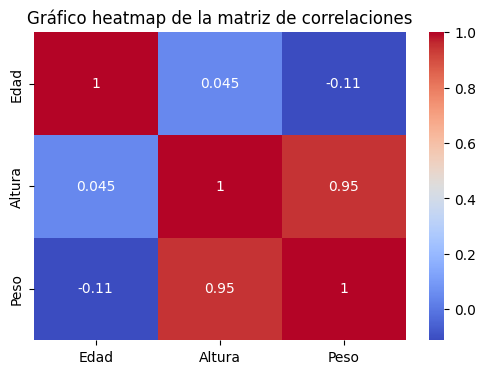

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Gráfico de la matriz de covarianzas "Heatmap"

plt.figure(figsize=(6, 4))

variables=['Edad', 'Altura', 'Peso']
sns.heatmap(S, annot=True, cmap='coolwarm', xticklabels=variables, yticklabels=variables)
plt.title('Gráfico heatmap de la matriz de correlaciones')
plt.show()

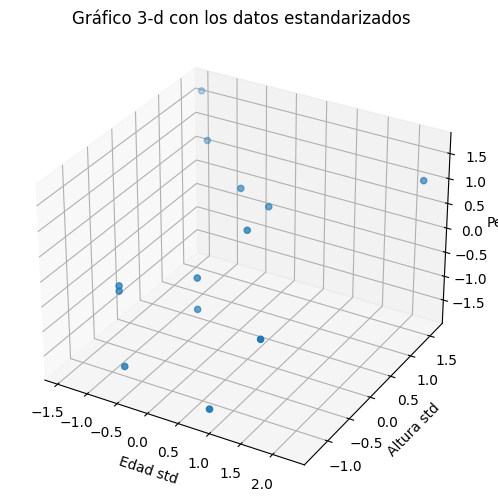

In [ ]:
# Gráfico 3d con los datos estandarizados
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(edad_std, altura_std, peso_std)

ax.set_xlabel('Edad std')
ax.set_ylabel('Altura std')
ax.set_zlabel('Peso')
plt.title('Gráfico 3-d con los datos estandarizados')
plt.show()


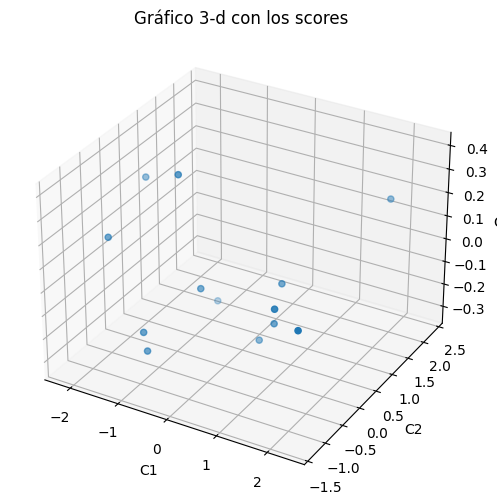

In [ ]:
# Gráfico 3d con los scores
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y[:,0],y[:,1],y[:,2])

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.title('Gráfico 3-d con los scores')
plt.show()

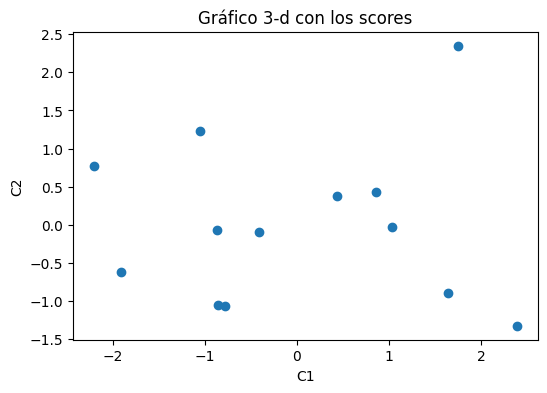

In [ ]:
# Gráfico de los scores en el plano C1 C2

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.scatter(y[:,0],y[:,1])

ax.set_xlabel('C1')
ax.set_ylabel('C2')

plt.title('Gráfico 3-d con los scores')
plt.show()


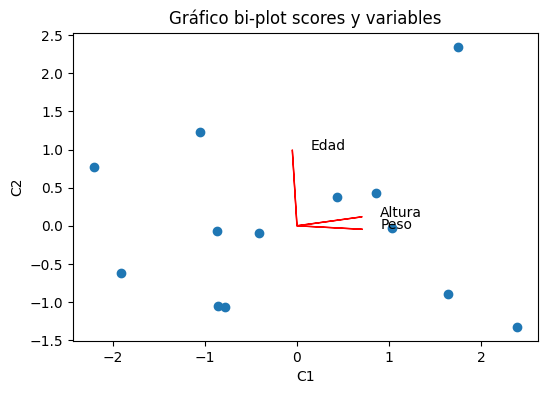

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

ax.scatter(y[:,0],y[:,1])

for i in range(3):
        plt.arrow(0, 0, v[0,i], v[1,i], color = 'r')
        plt.text(v[0,i]+.2, v[1,i] , variables[i])


ax.set_xlabel('C1')
ax.set_ylabel('C2')

plt.title('Gráfico bi-plot scores y variables')
plt.show()




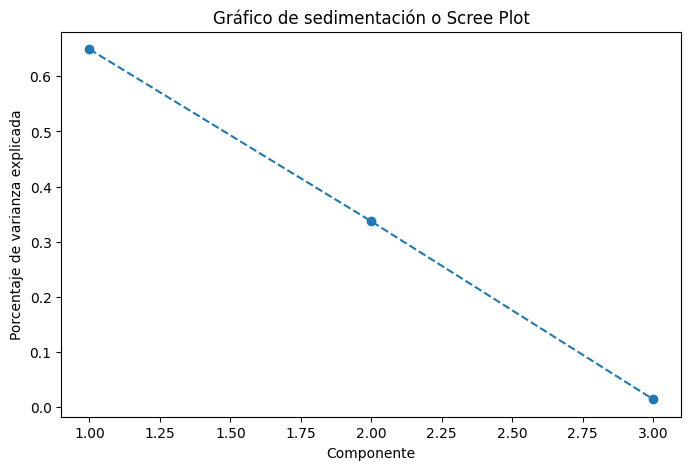

In [ ]:
# Hacer un gráfico de sedimentación o Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1,4), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Gráfico de sedimentación o Scree Plot')
plt.xlabel('Componente')
plt.ylabel('Porcentaje de varianza explicada')
plt.show()


In [ ]:
var_acum=np.cumsum(pca.explained_variance_ratio_)

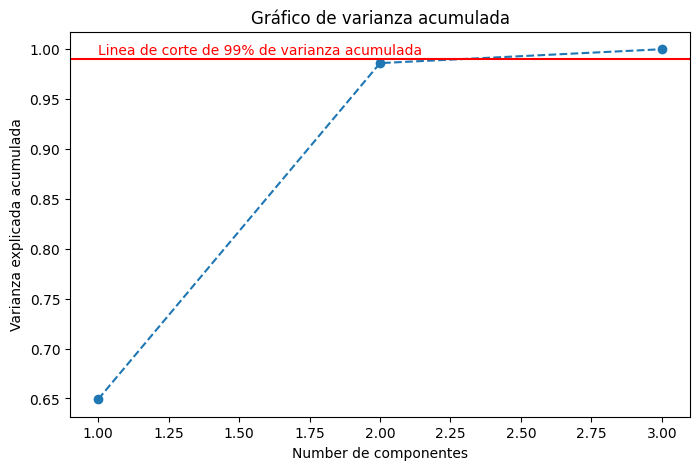

In [ ]:
# Hacer un gráfico de con la varianza acumulada
var_acum=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_acum) + 1), var_acum, marker='o', linestyle='--')
plt.title('Gráfico de varianza acumulada')
plt.xlabel('Number de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y=0.99, color='r', linestyle='-')  # Dibujar una línea de corete
plt.text(1, 0.995, 'Linea de corte de 99% de varianza acumulada', color = 'red', fontsize=10)
plt.show()